

The original dataset is scraped from TrueTrophies.com which is a website that maintains players' achievements of PlayStation games.

Sources:  
- [Original Kaggle notebook with dataset](https://www.kaggle.com/code/shivamb/playstation-4-games-starter-notebook)  
- [Notebook](https://www.kaggle.com/code/rahulyadav0710/play4joy) from which I copied countplot with patches  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


In [38]:
DATA_PATH = Path('./data/playstation_4_games.csv')

df = pd.read_csv(DATA_PATH)

In [39]:
def show_info(data: pd.DataFrame, name: str = "Dataset") -> None:
    """
    Display initial exploration metrics for a DataFrame.
    
    Parameters:
    -----------
    data : pd.DataFrame
        The dataset to explore
    name : str
        Name of the dataset for display purposes
    """
    print(f"\n{'='*60}")
    print(f"{name.upper()} - Initial Exploration")
    print(f"{'='*60}\n")
    
    # Display first few rows
    display(data.head())
    
    # Show structure and data types
    print("\nDataset Info:")
    data.info()
    
    # Check for duplicates
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
    # By default use all of the columns. Use subset parameter to specify particular columns.
    n_duplicates = data.duplicated().sum()
    print(f"\nDuplicate rows: {n_duplicates}")
    
    # Additional quality checks
    print(f"Missing values per column:")
    missing = data.isnull().sum()
    if missing.sum() > 0:
        display(missing[missing > 0])
    else:
        print("No missing values found")
    
    print(f"\nDataset shape: {data.shape[0]:,} rows × {data.shape[1]} columns")

In [40]:
show_info(df, "PS4 Games Dataset")


PS4 GAMES DATASET - Initial Exploration



,ID,GamePSID,GameName,Publisher,ReleaseYear,ReleaseDate,Developer,Genre,Features,Size,Medium,Hardware,CompletionTime(Hours),is_Digital_game,is_Physical_game,OfficialWebsite
0,1,3045,Q*Bert Rebooted,LOOT Interactive,2015.0,2015-02-17,Gonzo Games,Action,"PS Plus, PS Now",109.00,NaN,NaN,NaN,0,0,http://www.sidelineamusements.com/qbert/
1,2,3051,Q*Bert Rebooted (EU),LOOT Interactive,2015.0,2015-07-22,LOOT Interactive,Action,PS Now,127.00,Digital only,NaN,NaN,0,0,http://www.sidelineamusements.com/qbert/
2,3,6703,Q.U.B.E. 2,Trapped Nerve Games,2018.0,2018-03-13,Toxic Games,"Puzzle, Platformer",NaN,2682.88,Digital only,NaN,NaN,0,0,http://qube-game.com/
3,4,3403,Q.U.B.E. Director's Cut,GRIP Digital,2015.0,2015-07-21,Toxic Games,"Puzzle, Platformer",PS Plus,1945.60,Digital only,NaN,3-4,0,0,http://qube-game.com/
4,5,13176,Quake (PS4),Bethesda Softworks,2021.0,2021-08-19,"MachineGames, Nightdive Studios, id Software",First Person Shooter,NaN,NaN,Physical and Digital,NaN,NaN,0,0,https://bethesda.net/en/game/quake



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     9686 non-null   int64  
 1   GamePSID               9686 non-null   int64  
 2   GameName               9686 non-null   object 
 3   Publisher              8964 non-null   object 
 4   ReleaseYear            8952 non-null   float64
 5   ReleaseDate            8952 non-null   object 
 6   Developer              8987 non-null   object 
 7   Genre                  8898 non-null   object 
 8   Features               1749 non-null   object 
 9   Size                   7666 non-null   float64
 10  Medium                 8937 non-null   object 
 11  Hardware               1512 non-null   object 
 12  CompletionTime(Hours)  2230 non-null   object 
 13  is_Digital_game        9686 non-null   int64  
 14  is_Physical_game       9686 non-null   in

Publisher                 722
ReleaseYear               734
ReleaseDate               734
Developer                 699
Genre                     788
Features                 7937
Size                     2020
Medium                    749
Hardware                 8174
CompletionTime(Hours)    7456
OfficialWebsite          1597
dtype: int64


Dataset shape: 9,686 rows × 16 columns


The PlayStation 4 was released on November 15, 2013, in North America, November 29, 2013, in Europe, and February 22, 2014, in Japan.

**Description:** .

| Column | Description | Data Type | Notes |
|--------|-------------|-----------|-------|
| `ReleaseYear` | Game's release year | float -> int | Convert to int type|
| `call_date` | Date of the call | object → datetime | Requires type conversion |
| `duration` | Call duration in minutes | float → int | Will be rounded up to whole minutes per company policy |
| `user_id` | User identifier who made the call | int | Foreign key to users table |

This line removes rows where ReleaseYear is 2009 or 2022. df['ReleaseYear'].isin([2009, 2022]) builds a boolean mask that is True for those years; the ~ negates it so only other years remain, and the filtered result is reassigned to df.

In [32]:
# Filter out 2009 and 2022
df = df.loc[~df['ReleaseYear'].isin([2009, 2010, 2012, 2022])]

In [33]:
df['ReleaseYear'].value_counts().sort_index()

ReleaseYear
2013.0      56
2014.0     246
2015.0     477
2016.0     842
2017.0    1130
2018.0    1314
2019.0    1404
2020.0    1683
2021.0    1793
Name: count, dtype: int64

In [34]:
df['ReleaseYear'].isnull().sum()

np.int64(734)

### Count plot  

[seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

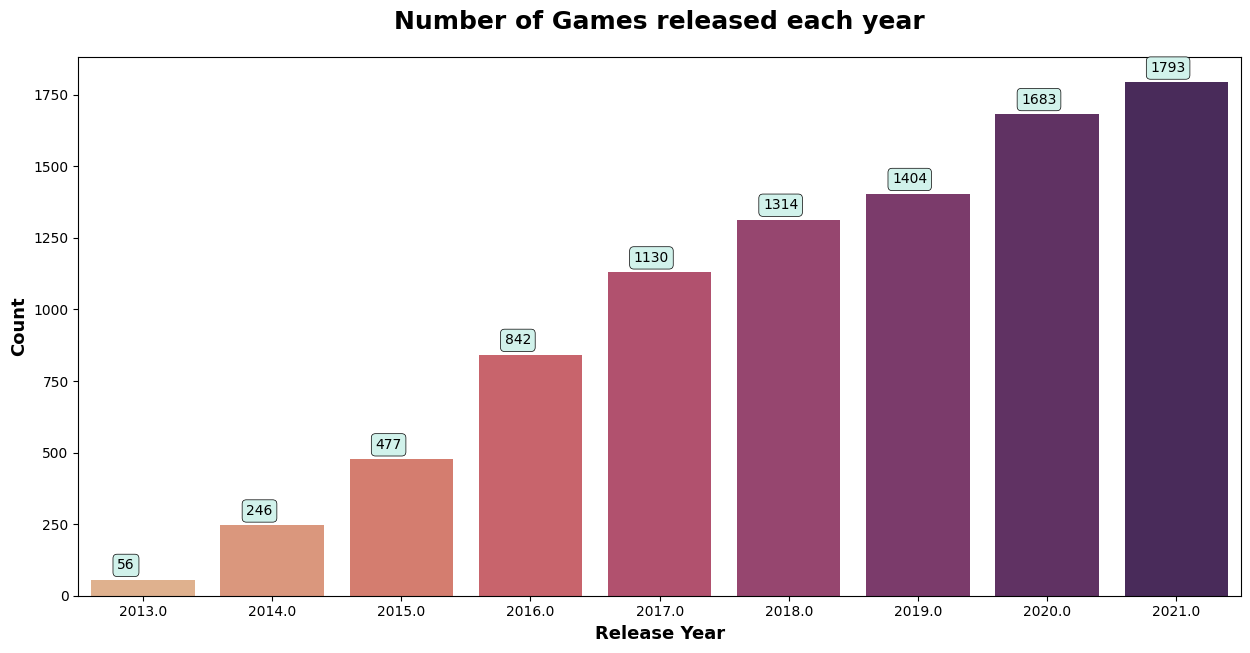

In [35]:
plt.figure(figsize=(15,7))
# If you don't use legend=False, it will create invisible bar with 0 legend mark. 
ax = sns.countplot(x = df['ReleaseYear'], hue=df['ReleaseYear'], legend=False, palette='flare')
plt.xlabel("Release Year", fontsize=13,weight = 'bold')
plt.ylabel("Count", fontsize=13,weight = 'bold')

# This loop iterates over each bar (patch) in the plot and adds a text label showing its count
for a in ax.patches:
    # value shows the count of each bar
    value = f'{a.get_height():.0f}'
    # x and y set the position of text over the bar
    # x: slightly right of the bar's left edge
    x = a.get_x()+0.2
    # y: 50 units above the bar's top
    y = a.get_height()+50 
    
    # Add text annotation
    ax.text(x, y, # coordinates (x, y) for text placement
            value, # text content (the count)
            ha='left', # horizontal alignment: 'left' | 'center' | 'right'
            va='center', # vertical alignment: 'top' | 'center' | 'bottom'
            fontsize=10, # font size in points
            bbox=dict(   # background box properties
                facecolor='#D1F2EB', # fill color
                edgecolor='black',  # border color
                boxstyle='round', # box shape: 'round' | 'square' | 'roundtooth'
                linewidth=0.5)) # border thickness
plt.title("Number of Games released each year", size=18, weight='bold', pad=20)
plt.show();

**What is a patch in Matplotlib?**  

A patch is an object that represents a shape drawn on a plot. In the context of bar charts, each bar is a Rectangle patch.  

ax.patches is a list of all patch objects (shapes) in the axes  
- For a bar chart: one patch per bar
- For grouped/hued plots: multiple patches per category  

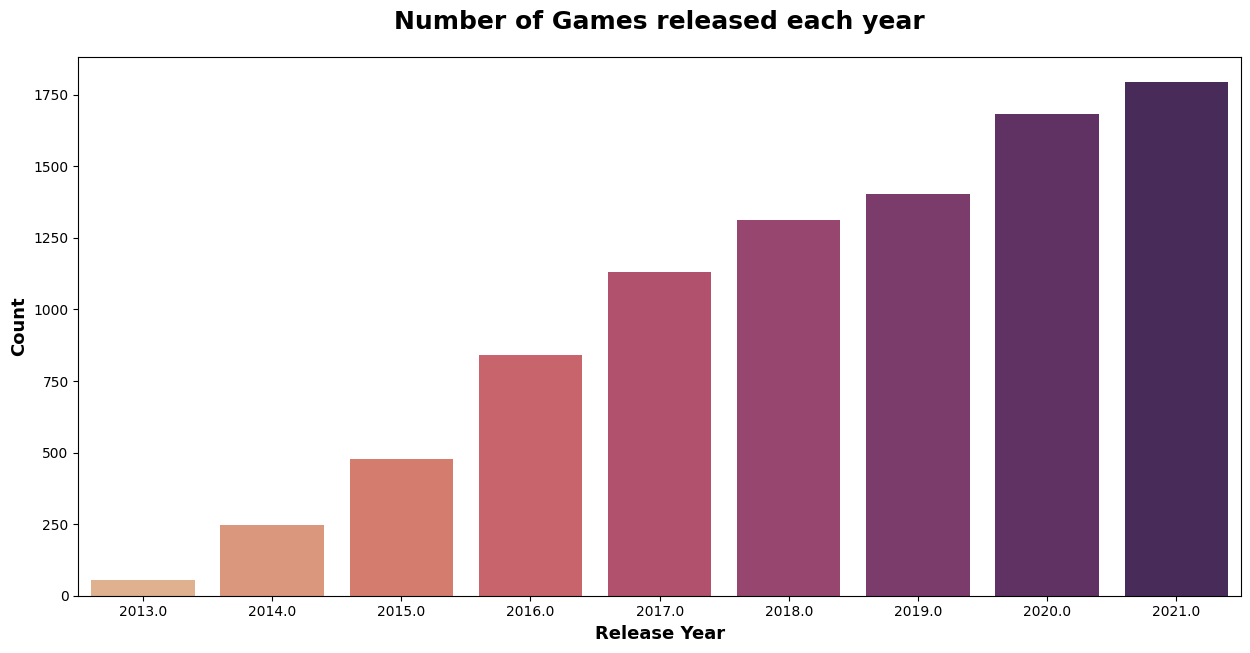

In [36]:
plt.figure(figsize=(15,7))
# If you don't use legend=False, it will create invisible bar with 0 legend mark. 
ax = sns.countplot(x = df['ReleaseYear'], hue=df['ReleaseYear'], legend=False, palette='flare')
plt.xlabel("Release Year", fontsize=13,weight = 'bold')
plt.ylabel("Count", fontsize=13,weight = 'bold')


plt.title("Number of Games released each year", size=18, weight='bold', pad=20)
plt.show();